### Student Information
Name: 黃昱霖

Student ID: 108061539

GitHub ID: YulinHuang0923

---

### Instructions

1. First: do the **take home** exercises in the [DM19-Lab1-Master Repo](https://github.com/EvaArevalo/DM19-Lab1-Master). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM19-Lab1-Master Repo](https://github.com/EvaArevalo/DM19-Lab1-Master) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The dataset contains a `sentence` and `score` label. Read the specificiations of the dataset for details. 
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/EvaArevalo/DM19-Lab1-Master/blob/master/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (Oct. 29th 11:59 pm, Tuesday)__. 

### Part 1: Take Home Exercises

In [203]:
# necessary for when working with external scripts
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [204]:
# categories
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']
# obtain the documents containing the categories provided
from sklearn.datasets import fetch_20newsgroups

twenty_train = fetch_20newsgroups(subset='train', categories=categories, \
                                  shuffle=True, random_state=42)

In [205]:
import pandas as pd
# my functions
import helpers.data_mining_helpers as dmh

# construct dataframe from a list
X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns= ['text'])
# add category to the dataframe
X['category'] = twenty_train.target
# add category label also
X['category_name'] = X.category.apply(lambda t: dmh.format_labels(t, twenty_train))

### ** >>> Exercise 2 (take home):** 
Experiment with other querying techniques using pandas dataframes. Refer to their [documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html) for more information. 

In [206]:
# take a brief look of the dataframe
X.head()

,text,category,category_name
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,soc.religion.christian


In [207]:
# basic
X[0:5][['text', 'category_name']]

,text,category_name
0,From: sd345@city.ac.uk (Michael Collier) Subje...,comp.graphics
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,comp.graphics
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,soc.religion.christian
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,soc.religion.christian
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,soc.religion.christian


In [208]:
# attribute access
X.text[0:5]

0    From: sd345@city.ac.uk (Michael Collier) Subje...
1    From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...
2    From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...
3    From: s0612596@let.rug.nl (M.M. Zwart) Subject...
4    From: stanly@grok11.columbiasc.ncr.com (stanly...
Name: text, dtype: object

In [209]:
# select by label (loc)
X.loc[::2, ['text', 'category_name']][0:5]

,text,category_name
0,From: sd345@city.ac.uk (Michael Collier) Subje...,comp.graphics
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,soc.religion.christian
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,soc.religion.christian
6,From: jodfishe@silver.ucs.indiana.edu (joseph ...,soc.religion.christian
8,From: geb@cs.pitt.edu (Gordon Banks) Subject: ...,sci.med


In [210]:
# select by position (iloc)
X.iloc[::2, [0, 2]][0:5]

,text,category_name
0,From: sd345@city.ac.uk (Michael Collier) Subje...,comp.graphics
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,soc.religion.christian
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,soc.religion.christian
6,From: jodfishe@silver.ucs.indiana.edu (joseph ...,soc.religion.christian
8,From: geb@cs.pitt.edu (Gordon Banks) Subject: ...,sci.med


In [211]:
# selection by callable
X.loc[lambda x: x.category_name=='comp.graphics'][0:5]

,text,category,category_name
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics
11,From: amjad@eng.umd.edu (Amjad A Soomro) Subje...,1,comp.graphics
14,From: sloan@cis.uab.edu (Kenneth Sloan) Subjec...,1,comp.graphics
15,From: Mike_Peredo@mindlink.bc.ca (Mike Peredo)...,1,comp.graphics


In [212]:
# selection by callable
X.category.loc[lambda x: x>0][0:5]

0    1
1    1
2    3
3    3
4    3
Name: category, dtype: int64

### >>> **Exercise 5 (take home)** 
There is an old saying that goes, "The devil is in the details." When we are working with extremely large data, it's difficult to check records one by one (as we have been doing so far). And also, we don't even know what kind of missing values we are facing. Thus, "debugging" skills get sharper as we spend more time solving bugs. Let's focus on a different method to check for missing values and the kinds of missing values you may encounter. It's not easy to check for missing values as you will find out in a minute.

Please check the data and the process below, describe what you observe and why it happened.   
$Hint$ :  why `.isnull()` didn't work?

In [213]:
import numpy as np

NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
NA_df

,id,missing_example
0,A,NaN
1,B,NaN
2,C,NaN
3,D,None
4,E,None
5,F,


In [214]:
NA_df['missing_example'].isnull()

0     True
1     True
2    False
3    False
4     True
5    False
Name: missing_example, dtype: bool

### Answer here

After applying the ".isnull()" function, we can see that np.nan, missing value, and None are considered as null, while 'NaN', 'None', and '' are taken as strings, which represents the word "NaN", "None" and an empty string. Therefore, if the dataframe is recorded in the later representation, we couldn't apply ".isnull()" function to detect missing values.


### >>> Exercise 6 (take home):
Notice any changes to the `X` dataframe? What are they? Report every change you noticed as compared to the previous state of `X`. Feel free to query and look more closely at the dataframe for these changes.

In [215]:
# First, we check the number of data
X_sample = X.sample(n=1000)
print(len(X))
print(len(X_sample))

2257
1000


In [216]:
# Next, we check the distribution of each categories
for category in categories:
    num_origin = len(X.category_name[lambda x: x == category])
    num_sample = len(X_sample.category_name[lambda x: x == category])
    rate_origin = num_origin / len(X) * 100
    rate_sample = num_sample / len(X_sample) * 100
    print('Number of %-22s, changes from %d (%.2f%%) to %d (%.2f%%)' % \
          (category, num_origin, rate_origin, num_sample, rate_sample))

Number of alt.atheism           , changes from 480 (21.27%) to 205 (20.50%)
Number of soc.religion.christian, changes from 599 (26.54%) to 268 (26.80%)
Number of comp.graphics         , changes from 584 (25.88%) to 269 (26.90%)
Number of sci.med               , changes from 594 (26.32%) to 258 (25.80%)


We can find out that the sample function keeps the distribution of each category.

### >>> **Exercise 8 (take home):** 
We can also do a side-by-side comparison of the distribution between the two datasets, but maybe you can try that as an excerise. Below we show you an snapshot of the type of chart we are looking for. 

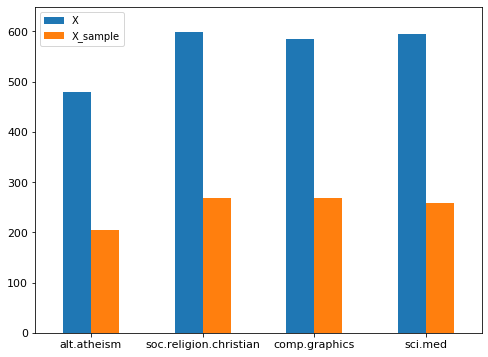

In [217]:
# answer here
import matplotlib.pyplot as plt
%matplotlib inline
# count each category
X_num_lst = [len(X.category_name[lambda x: x == category]) for category in categories]
X_sample_num_lst = [len(X_sample.category_name[lambda x: x == category]) for category in categories]
# plot
upperbound = max(X_num_lst) + 50
df = pd.DataFrame({'X': X_num_lst, 'X_sample': X_sample_num_lst}, index=categories)
ax = df.plot.bar(ylim=[0, upperbound], rot=0, fontsize = 11, figsize = (8,6))

### **>>> Exercise 10 (take home):**
We said that the `1` at the beginning of the fifth record represents the `00` term. Notice that there is another 1 in the same record. Can you provide code that can verify what word this 1 represents from the vocabulary. Try to do this as efficient as possible.

In [218]:
import nltk
# takes a like a minute or two to process
X['unigrams'] = X['text'].apply(lambda x: dmh.tokenize_text(x))

In [219]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text)
analyze = count_vect.build_analyzer()

In [220]:
import numpy as np
# Answer here
word = np.array(count_vect.get_feature_names())[np.where(X_counts[4, 0:100].toarray()[0] == 1)][-1]
print('word represents from the vocbulary: {}'.format(word))

word represents from the vocbulary: 01


### **>>> Exercise 11 (take home):** 
From the chart above, we can see how sparse the term-document matrix is; i.e., there is only one terms with frequency of `1` in the subselection of the matrix. By the way, you may have noticed that we only selected 20 articles and 20 terms to plot the histrogram. As an excersise you can try to modify the code above to plot the entire term-document matrix or just a sample of it. How would you do this efficiently? Remember there is a lot of words in the vocab. Report below what methods you would use to get a nice and useful visualization

### Answer here
By adding stop_words, we can reduce the words that is not really informative. Also, min_df and max_df calulate the document frequnecy, which removes the words that appears too frequently or infrequently. The words reserved now is more representative. Then, by max_features, I select the top 20 words, resulting in a matrix that is not so sparse. In selecting documents, we pick top 20 documents with most counted words to show the result.

In [221]:
# pick top 20 words
count_vect_my = CountVectorizer(stop_words='english', max_features=20, min_df=0.01, max_df=0.8)
X_counts_my = count_vect_my.fit_transform(X.text)
analyze = count_vect_my.build_analyzer()

In [222]:
# pick top 20 documents
selected_X = np.argsort(X_counts_my.toarray().sum(1))[-20:]

In [223]:
plot_x = ["term_"+str(i) for i in count_vect_my.get_feature_names()]
plot_y = ["doc_"+ str(i) for i in selected_X]
plot_z = X_counts_my[selected_X, :].toarray()

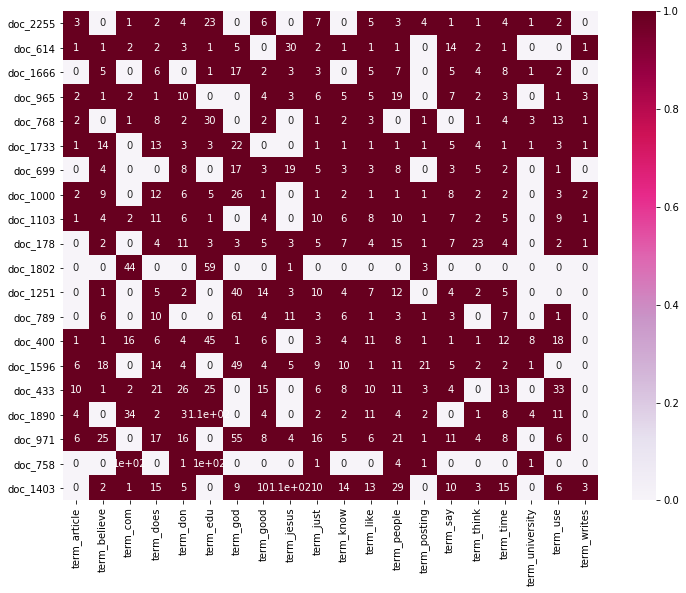

In [224]:
import seaborn as sns

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(12, 9))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

### >>> Exercise 12 (take home):
Please try to reduce the dimension to 3, and plot the result use 3-D plot. Use at least 3 different angle (camera position) to check your result and describe what you found.

$Hint$: you can refer to Axes3D in the documentation.

In [225]:
from sklearn.decomposition import PCA
X_reduced = PCA(n_components = 3).fit_transform(X_counts.toarray())

Text(0.5, 0, 'Z label')

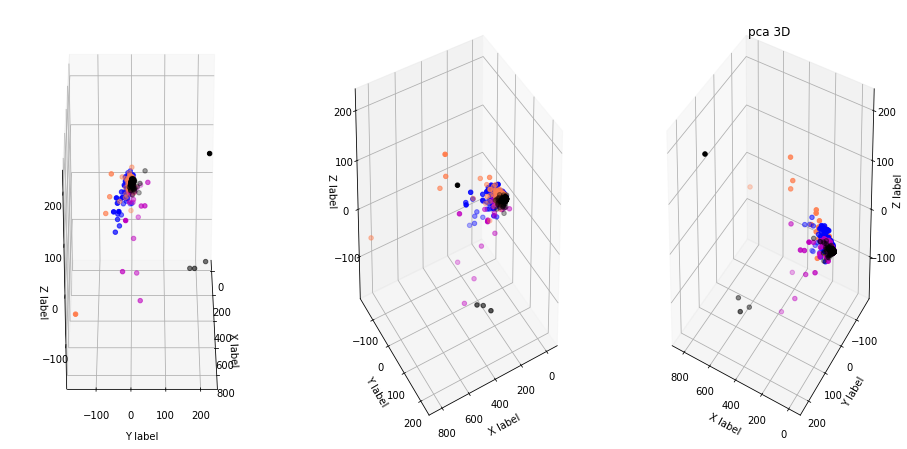

In [226]:
from mpl_toolkits.mplot3d import Axes3D

#plot settings
col = ['coral', 'blue', 'black', 'm']
fig = plt.figure(figsize=(16,8))

plt_1 = fig.add_subplot(1,3,1, projection='3d')
for category, c in zip(categories, col):
    plt_1.scatter(xs = X_reduced[X['category_name'] == category].T[0],
                 ys = X_reduced[X['category_name'] == category].T[1],
                 zs = X_reduced[X['category_name'] == category].T[2],
                 c=c, label=category, marker='o')
    
plt_2 = fig.add_subplot(1,3,2, projection='3d')
for category, c in zip(categories, col):
    plt_2.scatter(xs = X_reduced[X['category_name'] == category].T[0],
                 ys = X_reduced[X['category_name'] == category].T[1],
                 zs = X_reduced[X['category_name'] == category].T[2],
                 c=c, label=category, marker='o')
    
plt_3 = fig.add_subplot(1,3,3, projection='3d')
for category, c in zip(categories, col):
    plt_3.scatter(xs = X_reduced[X['category_name'] == category].T[0],
                 ys = X_reduced[X['category_name'] == category].T[1],
                 zs = X_reduced[X['category_name'] == category].T[2],
                 c=c, label=category, marker='o')

plt_1.view_init(30, 0)
plt_2.view_init(30, 60)
plt_3.view_init(30, 120)
plt.title('pca 3D')
plt_1.set_xlabel('X label')
plt_1.set_ylabel('Y label')
plt_1.set_zlabel('Z label')
plt_2.set_xlabel('X label')
plt_2.set_ylabel('Y label')
plt_2.set_zlabel('Z label')
plt_3.set_xlabel('X label')
plt_3.set_ylabel('Y label')
plt_3.set_zlabel('Z label')

### >>> **Exercise 13 (take home):**
If you want a nicer interactive visualization here, I would encourage you try to install and use plotly to achieve this.

In [227]:
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

In [228]:
# Answer here
import plotly.graph_objects as go

feature_name = count_vect.get_feature_names()[:300]
frequency = term_frequencies[:300]

data = go.Bar(
    x = feature_name,
    y = frequency,
)
layout = go.Layout(
    title = 'Freq',
    yaxis = {"title": "Frequency"},
    xaxis = {"title": "Words"}
)
fig = go.Figure(data=data, layout=layout)
fig.show()

### >>> **Exercise 14 (take home):** 
The chart above contains all the vocabulary, and it's computationally intensive to both compute and visualize. Can you efficiently reduce the number of terms you want to visualize as an exercise. 


### Answer here
Similar Process as in Exercise 11, we pick top 50 words as features

In [229]:
count_vect_my = CountVectorizer(stop_words='english', max_features=50, min_df=0.01, max_df=0.8)
X_counts_my = count_vect_my.fit_transform(X.text)
term_frequencies = np.asarray(X_counts_my.sum(axis=0))[0]

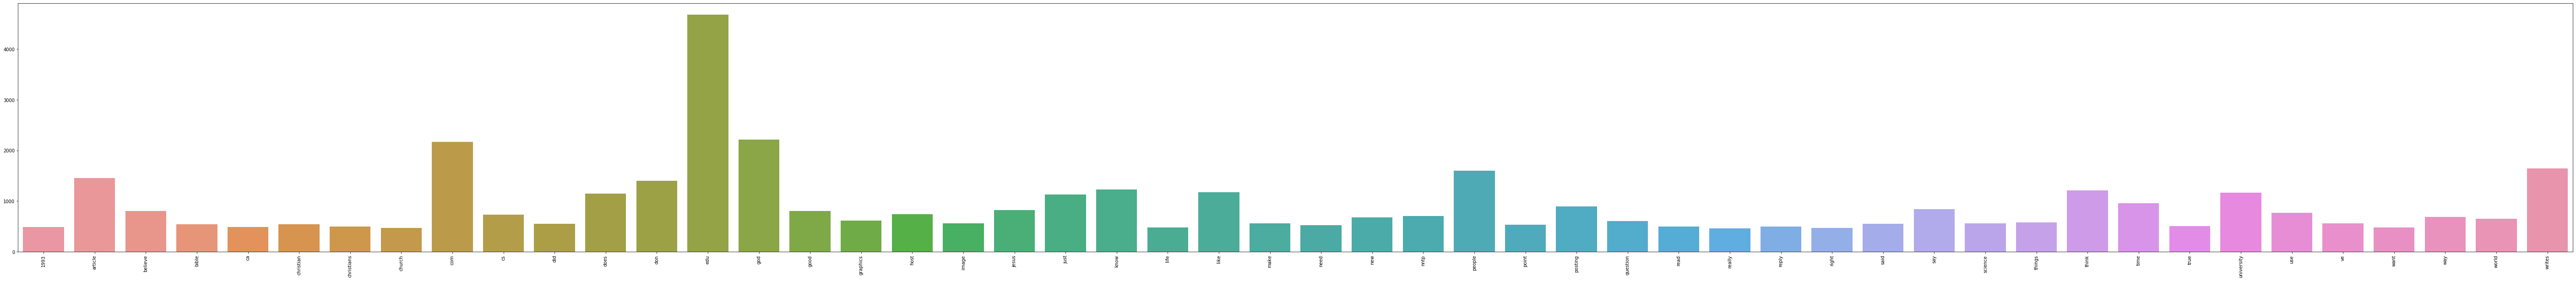

In [230]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect_my.get_feature_names(), 
            y=term_frequencies)
g.set_xticklabels(count_vect_my.get_feature_names(), rotation = 90);

### >>> **Exercise 15 (take home):** 
Additionally, you can attempt to sort the terms on the `x-axis` by frequency instead of in alphabetical order. This way the visualization is more meaninfgul and you will be able to observe the so called [long tail](https://en.wikipedia.org/wiki/Long_tail) (get familiar with this term since it will appear a lot in data mining and other statistics courses). see picture below

![alt txt](https://upload.wikimedia.org/wikipedia/commons/thumb/8/8a/Long_tail.svg/1000px-Long_tail.svg.png)

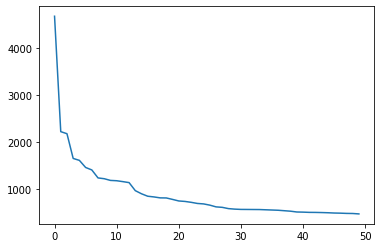

In [231]:
# Answer here
long_tail = sorted(term_frequencies, reverse=True)
plt.plot(long_tail)

### >>> **Exercise 16 (take home):**
Try to generate the binarization using the `category_name` column instead. Does it work?

In [232]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy
# Answer here
mlb = preprocessing.LabelBinarizer()
mlb.fit(X.category_name)

LabelBinarizer(neg_label=0, pos_label=1, sparse_output=False)

In [233]:
mlb.classes_

array(['alt.atheism', 'comp.graphics', 'sci.med',
       'soc.religion.christian'], dtype='<U22')

In [234]:
X['bin_category_name'] = mlb.transform(X['category_name']).tolist()

In [235]:
X[0:9]

,text,category,category_name,unigrams,bin_category_name
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics,"[From, :, sd345, @, city.ac.uk, (, Michael, Co...","[0, 1, 0, 0]"
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics,"[From, :, ani, @, ms.uky.edu, (, Aniruddha, B....","[0, 1, 0, 0]"
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian,"[From, :, djohnson, @, cs.ucsd.edu, (, Darin, ...","[0, 0, 0, 1]"
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian,"[From, :, s0612596, @, let.rug.nl, (, M.M, ., ...","[0, 0, 0, 1]"
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,soc.religion.christian,"[From, :, stanly, @, grok11.columbiasc.ncr.com...","[0, 0, 0, 1]"
5,From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...,3,soc.religion.christian,"[From, :, vbv, @, lor.eeap.cwru.edu, (, Virgil...","[0, 0, 0, 1]"
6,From: jodfishe@silver.ucs.indiana.edu (joseph ...,3,soc.religion.christian,"[From, :, jodfishe, @, silver.ucs.indiana.edu,...","[0, 0, 0, 1]"
7,From: aldridge@netcom.com (Jacquelin Aldridge)...,2,sci.med,"[From, :, aldridge, @, netcom.com, (, Jacqueli...","[0, 0, 1, 0]"
8,From: geb@cs.pitt.edu (Gordon Banks) Subject: ...,2,sci.med,"[From, :, geb, @, cs.pitt.edu, (, Gordon, Bank...","[0, 0, 1, 0]"


By the result, we can see that it works for category_name, too!

### Part 2: New Dataset

### Data Preprocessing

In [58]:
# Data Preparation
def read_lines(txt):
    f = open(txt, "r")
    lines = []
    for line in f.readlines():
        lines.append(line.split('\n')[0])
    num = len(lines)
    return lines, num

text_lst = ["./sentiment labelled sentences/imdb_labelled.txt",
            "./sentiment labelled sentences/yelp_labelled.txt",
            "./sentiment labelled sentences/amazon_cells_labelled.txt"]

lines, length = [], []
for text in text_lst:
    line, num = read_lines(text)
    lines.extend(line)
    length.append(num)

In [59]:
# number of data
len(lines)

3000

In [199]:
# Data Transformation
import pandas as pd
import numpy as np
import helpers.data_mining_helpers as dmh

# construct dataframe from a list
sentences, labels = [], []
for idx, line in enumerate(lines):
    sentences.append(line.split("\t")[0])
    labels.append(int(line.split("\t")[1]))
data = np.array([sentences, labels]).T
X = pd.DataFrame(data=data, columns=['sentence', 'label'])

In [42]:
X.head()

,sentence,label
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1


In [43]:
# Check Missing Value
X.isnull().apply(lambda x: dmh.check_missing_values(x))

sentence    (The amoung of missing records is: , 0)
label       (The amoung of missing records is: , 0)
dtype: object

In [44]:
# Dealing Duplicate Data
sum(X.duplicated())

17

In [45]:
# Drop Duplicate Data & check shape
X.drop_duplicates(keep=False, inplace=True)
print(X.shape)

(2966, 2)


In [46]:
# Tokenize
import nltk
X['unigrams'] = X['sentence'].apply(lambda x: dmh.tokenize_text(x))

In [76]:
# Feature subset selection
from sklearn.feature_extraction.text import CountVectorizer
# term-document matrix
count_vect = CountVectorizer(stop_words='english', max_features=20, min_df=0.01, max_df=0.8)
X_counts = count_vect.fit_transform(X.sentence)

In [77]:
# check shape
X_counts.shape

(2966, 20)

### Visualization

<BarContainer object of 3 artists>

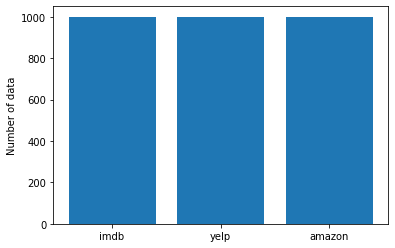

In [74]:
import matplotlib.pyplot as plt
%matplotlib inline
# datasets
data = ['imdb', 'yelp', 'amazon']
plt.ylabel('Number of data')
plt.bar(data, length)

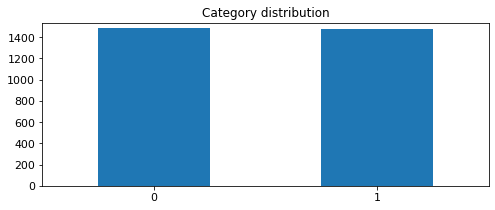

In [75]:
# label distribution
upperbound = max([len(X.label[lambda x: x == str(label)]) for label in set(labels)]) + 50
X.label.value_counts().plot(kind = 'bar',
                          title = 'Category distribution',
                          ylim = [0, upperbound],        
                          rot = 0, fontsize = 11, figsize = (8,3))

In [80]:
# heatmap
import seaborn as sns
# obtain top 20
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names()]

# obtain document index
selected_X = np.argsort(X_counts.toarray().sum(1))[-20:]
plot_y = ["doc_"+ str(i) for i in selected_X]

plot_z = X_counts[selected_X, :].toarray()

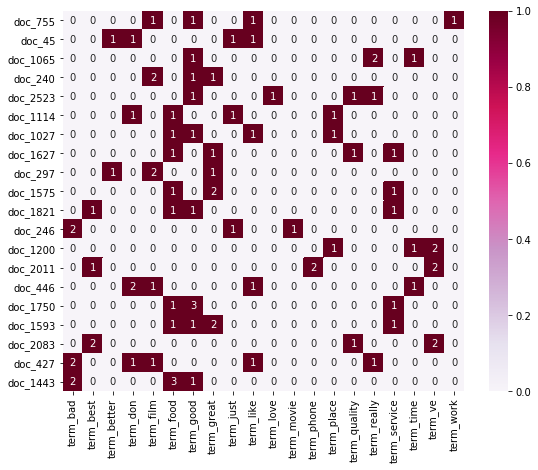

In [81]:
# plot
df_todraw = pd.DataFrame(plot_z, columns=plot_x, index=plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

### Dimension Reduction

In [82]:
from sklearn.decomposition import PCA

X_reduced = PCA(n_components = 2).fit_transform(X_counts.toarray())

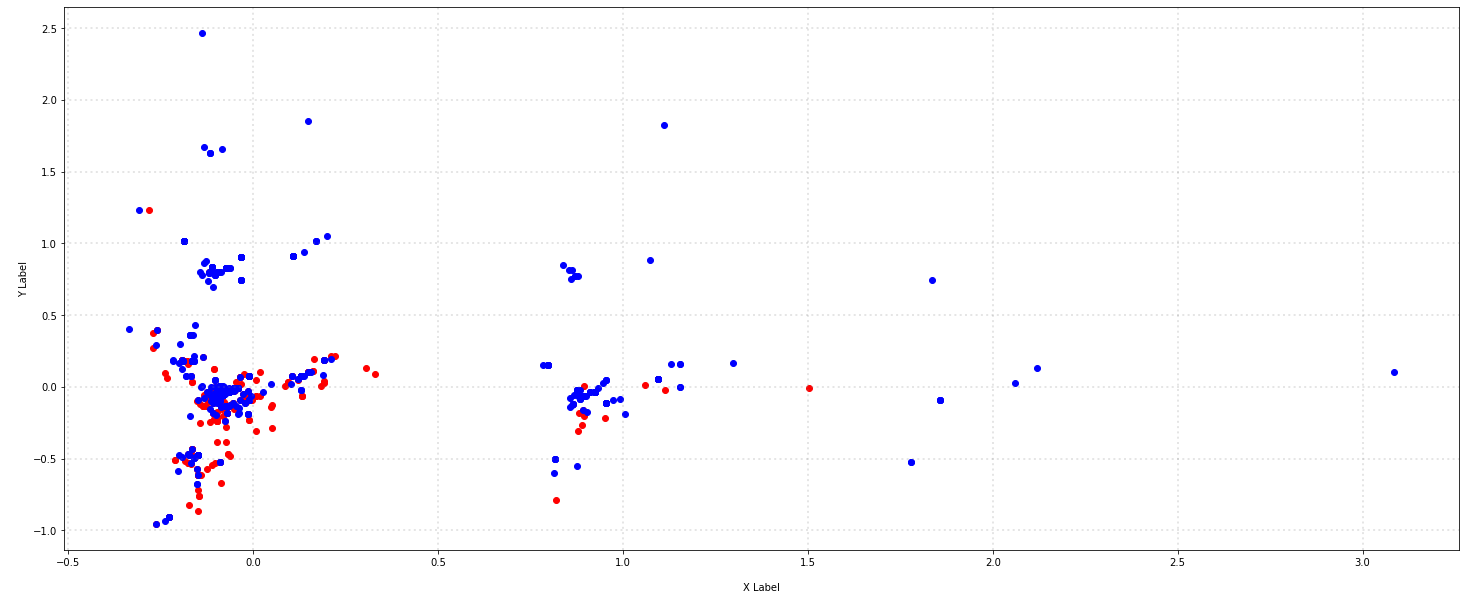

In [84]:
col = ['red', 'blue']

# plot
fig = plt.figure(figsize = (25,10))
ax = fig.subplots()

for c, label in zip(col, set(labels)):
    xs = X_reduced[X['label'] == str(label)].T[0]
    ys = X_reduced[X['label'] == str(label)].T[1]
   
    ax.scatter(xs, ys, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')

plt.show()

### Atrribute Transformation / Aggregation

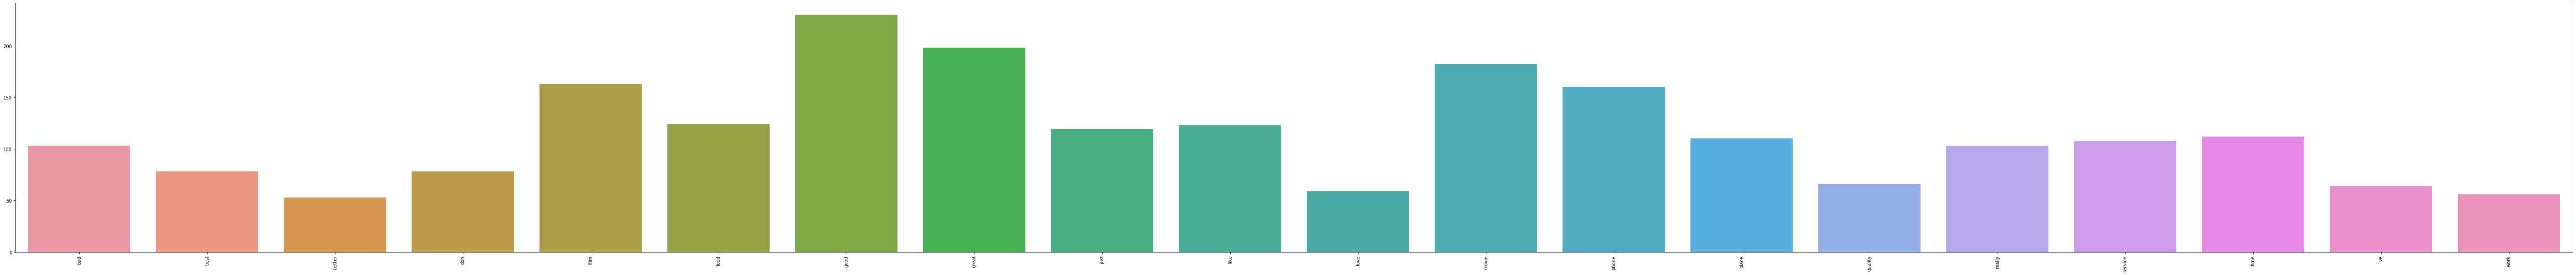

In [87]:
# term frequencies
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]
# plot
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names(), 
            y=term_frequencies)
g.set_xticklabels(count_vect.get_feature_names(), rotation = 90);

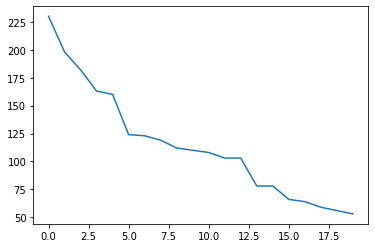

In [88]:
# long tail
long_tail = sorted(term_frequencies, reverse=True)
plt.plot(long_tail)

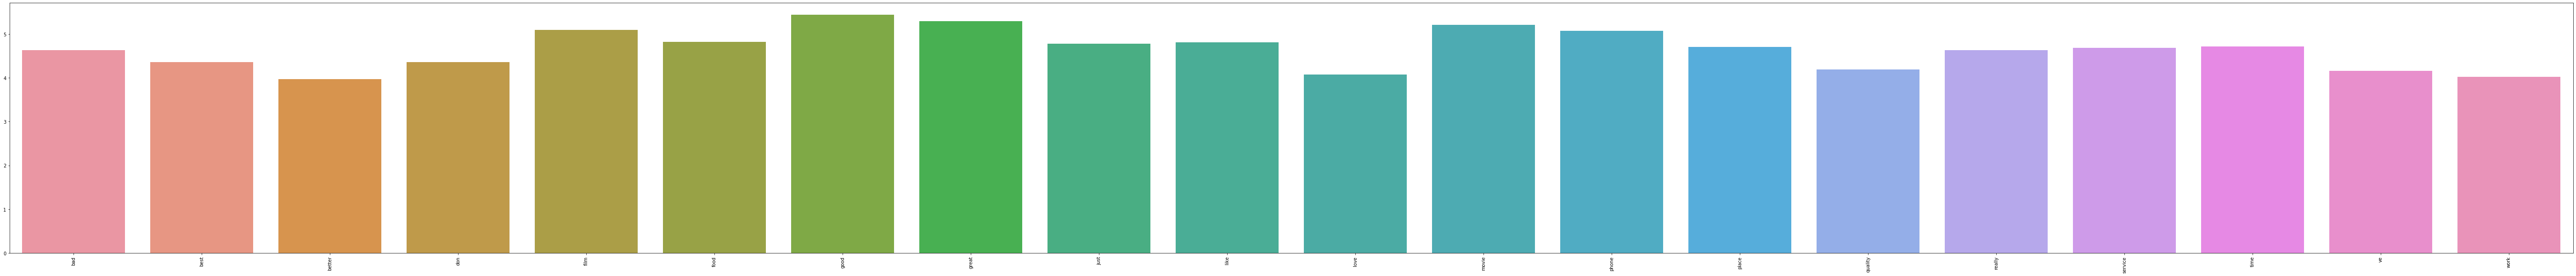

In [89]:
# log scale
import math
term_frequencies_log = [math.log(i) for i in term_frequencies]
# plot
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names(), 
            y=term_frequencies_log)
g.set_xticklabels(count_vect.get_feature_names(), rotation = 90);

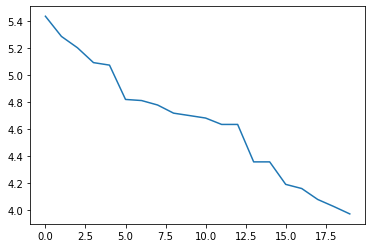

In [91]:
# long tail
long_tail_log = sorted(term_frequencies_log, reverse=True)
plt.plot(long_tail_log)

### Data Exploration

In [150]:
from sklearn import preprocessing
from sklearn.preprocessing import binarize
from sklearn.metrics.pairwise import cosine_similarity

count_vect = CountVectorizer(stop_words='english', max_features=50, min_df=0.01, max_df=0.8)
count_vect.fit(X.sentence)

['acting', 'amazing', 'bad', 'battery', 'best', 'better', 'characters', 'did', 'didn', 'disappointed', 'does', 'don', 'ear', 'excellent', 'film', 'food', 'going', 'good', 'got', 'great', 'headset', 'just', 'like', 'little', 'love', 'make', 'movie', 'nice', 'people', 'phone', 'place', 'pretty', 'product', 'quality', 'really', 'recommend', 'right', 'say', 'service', 'sound', 'thing', 'think', 'time', 'use', 've', 'waste', 'way', 'work', 'works', 'worst']


In [151]:
# random sample 5 sentences
X_sample = X.sample(n=5)
X_sample_counts = count_vect.transform(X_sample.sentence)

similarity_matrix = np.zeros((X_sample_counts.shape[0], X_sample_counts.shape[0]))
X_sample_counts_bin = binarize(X_sample_counts.toarray())
for i in range(X_sample_counts.shape[0]):
    vector_1 = X_sample_counts_bin[i].reshape(1, -1)
    for j in range(X_sample_counts.shape[0]):
        if j < i:
            continue
        vector_2 = X_sample_counts_bin[j].reshape(1, -1)
        score = cosine_similarity(vector_1, vector_2)
        similarity_matrix[i][j] = score
        similarity_matrix[j][i] = score
print(similarity_matrix)

[[1.         0.         0.         0.35355339 0.        ]
 [0.         1.         0.         0.         0.        ]
 [0.         0.         1.         0.         0.        ]
 [0.35355339 0.         0.         1.         0.        ]
 [0.         0.         0.         0.         1.        ]]


In [152]:
X_sample.label

1968    0
292     1
1091    1
1827    0
1933    0
Name: label, dtype: object

By the similarity matrix, we can see that the cosine similartiy between same sentences are always 1 (as expected), and the cosine similartiy = 0 (entirely different) in most of the time. 
Notice that the cosine similarity between 1968 and 1827 is 0.35, which have the same label. 

In [154]:
# print and observe
print(X_sample.sentence[1968])
print(X_sample.sentence[1827])

We've have gotten a much better service from the pizza place next door than the services we received from this restaurant.
For that price I can think of a few place I would have much rather gone.


### Part 3: New Dataset & New Operations

In [204]:
# Data Transformation
import pandas as pd
import numpy as np
import helpers.data_mining_helpers as dmh

# construct dataframe from a list
sentences, labels = [], []
for idx, line in enumerate(lines):
    sentences.append(line.split("\t")[0])
    labels.append(int(line.split("\t")[1]))
data = np.array([sentences, labels]).T
X = pd.DataFrame(data=data, columns=['sentence', 'label'])

In [205]:
# Data Transformation
import pandas as pd
import numpy as np
import helpers.data_mining_helpers as dmh

# construct dataframe from a list
sentences, labels = [], []
for idx, line in enumerate(lines):
    sentences.append(line.split("\t")[0])
    labels.append(int(line.split("\t")[1]))
data = np.array([sentences, labels]).T
X = pd.DataFrame(data=data, columns=['sentence', 'label'])

### 1. new data visualization
generate wordcloud, which show which words are the most frequent among the given text.

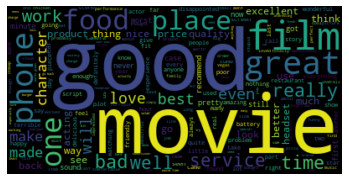

In [206]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

text = ''.join(X.sentence)
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

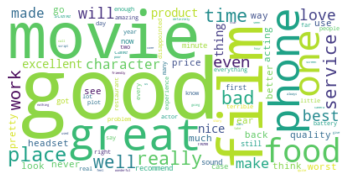

In [207]:
# add stopword & max words
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, max_words=100, background_color="white").generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### 2. TF-IDF features

In [222]:
# Generate TF-IDF features
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

count_vect = CountVectorizer()
X_count = count_vect.fit_transform(X.sentence)

vectorizer = TfidfVectorizer()
X_tfidf = vectorizer.fit_transform(X.sentence)  

In [223]:
# compare tf-idf features and token counts
print(X_count.shape)
print(X_tfidf.shape)

(3000, 5155)
(3000, 5155)


In [224]:
X_count.toarray()[0][0:100]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [225]:
X_tfidf.toarray()[0][0:100]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

we can see that their shape are the same, but the weights are different

### 3. Naive Bayes classifier 

In [229]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split

# train test split
x_train_tfidf, x_test_tfidf, y_train_tfidf, y_test_tfidf = train_test_split(X_tfidf, labels, test_size=0.25)
x_train_count, x_test_count, y_train_count, y_test_count = train_test_split(X_count, labels, test_size=0.25)

# train model
bnb_tfidf = BernoulliNB(binarize=0.0)
bnb_tfidf.fit(x_train_tfidf, y_train_tfidf)
bnb_count = BernoulliNB(binarize=0.0)
bnb_count.fit(x_train_count, y_train_count)

# prediction & evaluation
print('accuracy of tfidf features: %.4f' % bnb_tfidf.score(x_test_tfidf, y_test_tfidf))
print('accuracy of count features: %.4f' % bnb_tfidf.score(x_test_count, y_test_count))

accuracy of tfidf features: 0.8293
accuracy of count features: 0.9267


In [230]:
# combine count and tfidf features
X_combine = np.hstack( (X_count.toarray(), X_tfidf.toarray()) )

# train test split
x_train_combine, x_test_combine, y_train_combine, y_test_combine = train_test_split(X_combine, labels, test_size=0.25)

# train model
bnb_combine = BernoulliNB(binarize=0.0)
bnb_combine.fit(x_train_combine, y_train_combine)

# prediction & evaluation
print('accuracy of combine features: %.4f' % bnb_combine.score(x_test_combine, y_test_combine))

accuracy of combine features: 0.8080


We can see that count features high higher accuracy. This may due to the scale of this dataset is not big enough.
Also, we combine the features and make the prediction, resulting in lower accuracy. This may due to curse of dimensionality.